# Udacity Data Engineering Capstone Project

Load, explore and clean the dimension tables with Pandas.

**Download the data** 
* Use data_utils.py functions
* Find all the csv files in ../data/source folder


## Import Libraries

In [1]:
import os
import configparser
import pandas as pd
import numpy as np
from datetime import datetime
import glob

## ```airlines.csv```

In [2]:
airlines_path = "../data/source/airlines.csv"

names = ['airline_id', 'name', 'alias', 'IATA', 'ICAO', 'callsign', 'country', 'active']
airlines_df = pd.read_csv( airlines_path, names=names)
airlines_df

,airline_id,name,alias,IATA,ICAO,callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
...,...,...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
6159,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
6160,21270,Air Carnival,NaN,2S,\N,NaN,India,Y


In [3]:
airlines_df.loc[ airlines_df.ICAO == 'AFR']
airlines_df = airlines_df.replace('\\N', np.nan)
airlines_df.loc[ ~airlines_df.ICAO.astype(str).str.isalpha()]

,airline_id,name,alias,IATA,ICAO,callsign,country,active
2079,2080,Electronic Data Systems,NaN,NaN,1Y,NaN,NaN,N
5511,5833,TEA Switzerland,NaN,NaN,4SW,NaN,Switzerland,N
5559,9811,Wataniya Airways,NaN,NaN,KW1,NaN,Kuwait,Y
5562,9825,Baltic Air lines,NaN,B1,BA1,Baltic,Latvia,Y
5565,9833,Epic Holiday,Epic Holidays,FA,4AA,Epic,United States,Y
...,...,...,...,...,...,...,...,...
6085,20218,Tomp Airlines,Tomp Airlines,ZT,T9P,NaN,Chile,Y
6089,20224,Global Airlines,Global Airlines,0G,GA0,NaN,Argentina,Y
6134,20881,Europe Jet,Europe Jet,EX,EU9,NaN,France,Y
6145,20995,BudgetAir,BudgetAir,1K,BG1,NaN,Germany,Y


In [4]:
# replace '\N' by null values

df1 = airlines_df.copy()
df1 = df1.replace( '\\N', np.nan)

df1['IATA'] = df1['IATA'].where( df1['IATA'].str.isalnum())
df1['ICAO'] = df1['ICAO'].where( df1['ICAO'].str.isalnum())
df1['active'] = df1['active'].apply( lambda x: True if x=='Y' else False)
df1 = df1.loc[ df1.active == True]
df1 = df1.dropna( subset=['ICAO'])
df1.head()

,airline_id,name,alias,IATA,ICAO,callsign,country,active
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,True
10,10,40-Mile Air,NaN,Q5,MLA,MILE-AIR,United States,True
13,13,Ansett Australia,NaN,AN,AAA,ANSETT,Australia,True
21,21,Aigle Azur,NaN,ZI,AAF,AIGLE AZUR,France,True
22,22,Aloha Airlines,NaN,AQ,AAH,ALOHA,United States,True


In [5]:
df1.loc[df1.ICAO.duplicated(keep=False)].sort_values('ICAO').head(60)

,airline_id,name,alias,IATA,ICAO,callsign,country,active
2985,2987,Japan Airlines,JAL Japan Airlines,JL,JAL,JAPANAIR,Japan,True
2986,2988,Japan Airlines Domestic,NaN,JL,JAL,J-BIRD,Japan,True
2827,2829,Icar Air,NaN,NaN,RAC,TUZLA AIR,Bosnia and Herzegovina,True
5509,5651,Royal Air Cambodge,NaN,VJ,RAC,NaN,Cambodia,True
3632,3637,Nepal Airlines,NaN,RA,RNA,ROYAL NEPAL,Nepal,True
4258,4264,Royal Nepal Airlines,NaN,RA,RNA,ROYAL NEPAL,Nepal,True
3380,3384,Malmo Aviation,NaN,NaN,SCW,SCANWING,Sweden,True
3382,3386,Malmö Aviation,NaN,TF,SCW,Scanwings,Sweden,True
5799,16459,Sky Regional,Air Canada Express,RS,SKV,Sky Regional,Canada,True
6099,20293,Sky Regional Airlines,NaN,NaN,SKV,Maple,Canada,True


In [6]:
# locate outliers

# for x in sorted(df1.callsign.unique().astype(str)):
#     print(x, x.isalnum())
    
col = 'alias'
df1.loc[df1[col].apply( lambda x: not ('').join(str(x).split(' ')).isalnum())]

,airline_id,name,alias,IATA,ICAO,callsign,country,active
5741,14881,LSM AIRLINES,Russian. Yours Air Lines,YZ,YZZ,Moscow frog,Russia,True
5802,16507,LSM International,Moskva-air,II,UWW,moose,Russia,True
5933,18241,Royal Airways,Royal Inc.,KG,RAW,RAW,United States,True
6017,19599,Skyline Ulasim Ticaret A.S.,Skyline Ulasim Ticaret A.S.,NaN,KCU,Kocoglu,Turkey,True
6021,19674,Rainbow Air (RAI),Rainbow Air (RAI),RN,RAB,Rainbow,United States,True
6071,20051,Fly Africa Zimbabwe,Zimbabwe flyafrica.com,NaN,FZW,Fresh Express,Zimbabwe,True
6072,20060,San Dima Air,(Cyber Airlines) Not Real,NaN,SDI,FAREFLIGHT,United States,True


## ```airports.csv```

In [7]:
airports_path = "../data/source/airports.csv"

df = pd.read_csv( airports_path)
df.head()


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62519 entries, 0 to 62518
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 62519 non-null  int64  
 1   ident              62519 non-null  object 
 2   type               62519 non-null  object 
 3   name               62519 non-null  object 
 4   latitude_deg       62519 non-null  float64
 5   longitude_deg      62519 non-null  float64
 6   elevation_ft       50919 non-null  float64
 7   continent          31843 non-null  object 
 8   iso_country        62272 non-null  object 
 9   iso_region         62519 non-null  object 
 10  municipality       56954 non-null  object 
 11  scheduled_service  62519 non-null  object 
 12  gps_code           42013 non-null  object 
 13  iata_code          9246 non-null   object 
 14  local_code         31197 non-null  object 
 15  home_link          3236 non-null   object 
 16  wikipedia_link     102

In [9]:
df.isna().sum()

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         11600
continent            30676
iso_country            247
iso_region               0
municipality          5565
scheduled_service        0
gps_code             20506
iata_code            53273
local_code           31322
home_link            59283
wikipedia_link       52283
keywords             51175
dtype: int64

In [10]:
df.scheduled_service.value_counts()

no     58401
yes     4118
Name: scheduled_service, dtype: int64

In [11]:
df.loc[df.municipality.astype(str).apply( lambda x: len(x)> 100)]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords


<AxesSubplot:ylabel='Frequency'>

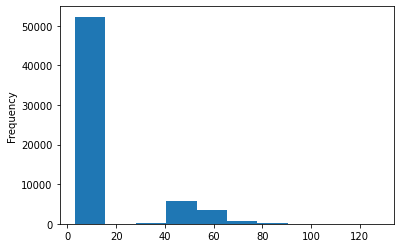

In [12]:
import matplotlib
df.wikipedia_link.astype(str).apply( lambda x: len(x)).plot.hist()

In [13]:
df1 = df.copy()
df1 = df1.replace( '-', np.nan)
df1.loc[ df1.duplicated( keep=False, subset=['ident'])]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords


In [14]:
import re
col = 'ident'
# Check if iso_country are alpha values
df1.loc[ ~df1[col].astype(str).str.isalnum()]
# Check if iso_region are alpha(without '-') values
df1.loc[df1[col].apply( lambda x: not ('').join(re.split('-', str(x))).isalnum())]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
20344,298431,EK_4,small_airport,Vejrø,55.035,11.375,NaN,EU,DK,DK-85,NaN,no,EK_4,NaN,NaN,NaN,NaN,NaN


## ```countries.csv```

In [15]:

countries = pd.read_csv('../data/source/countries.csv')
countries

,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,NaN
1,302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emir...,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
3,302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,NaN
4,302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN
...,...,...,...,...,...,...
242,302609,YT,Mayotte,AF,https://en.wikipedia.org/wiki/Mayotte,NaN
243,302610,ZA,South Africa,AF,https://en.wikipedia.org/wiki/South_Africa,NaN
244,302611,ZM,Zambia,AF,https://en.wikipedia.org/wiki/Zambia,NaN
245,302612,ZW,Zimbabwe,AF,https://en.wikipedia.org/wiki/Zimbabwe,NaN


In [16]:
countries.isna().sum()

id                  0
code                1
name                0
continent          41
wikipedia_link      0
keywords          155
dtype: int64

In [17]:
# check no country duplicates
countries.loc[ countries.duplicated( subset=['name'], keep=False)]
# check if code corresponds to alpha values
countries.loc[ ~countries.code.astype(str).str.isalpha()]
# check null iso_code 
countries.loc[countries.code.isna()]


,id,code,name,continent,wikipedia_link,keywords
156,302591,NaN,Namibia,AF,https://en.wikipedia.org/wiki/Namibia,NaN


In [18]:
"""
Process countries2.csv
1. Assign NaN iso codes with known one: Namibia
1. Drop other NaN iso codes
"""
countries2 = countries.copy()
countries2.loc[ countries2.name == 'Namibia', 'code'] = 'NAM'
countries2 = countries2.dropna(subset=['code'])
countries2

,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,NaN
1,302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emir...,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
3,302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,NaN
4,302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN
...,...,...,...,...,...,...
242,302609,YT,Mayotte,AF,https://en.wikipedia.org/wiki/Mayotte,NaN
243,302610,ZA,South Africa,AF,https://en.wikipedia.org/wiki/South_Africa,NaN
244,302611,ZM,Zambia,AF,https://en.wikipedia.org/wiki/Zambia,NaN
245,302612,ZW,Zimbabwe,AF,https://en.wikipedia.org/wiki/Zimbabwe,NaN


In [19]:
countries2.loc[ countries2.keywords.str.len() > 100]

,id,code,name,continent,wikipedia_link,keywords
